In [23]:
import pandas as pd
import numpy as np

In [24]:
df = pd.read_csv('train.csv' , usecols=['GarageQual' , 'FireplaceQu' , 'SalePrice'])

In [25]:
df.columns

Index(['FireplaceQu', 'GarageQual', 'SalePrice'], dtype='object')

In [26]:
df

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


In [27]:
df.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [49]:
df.GarageQual.isna().sum()

np.int64(81)

<Axes: xlabel='GarageQual'>

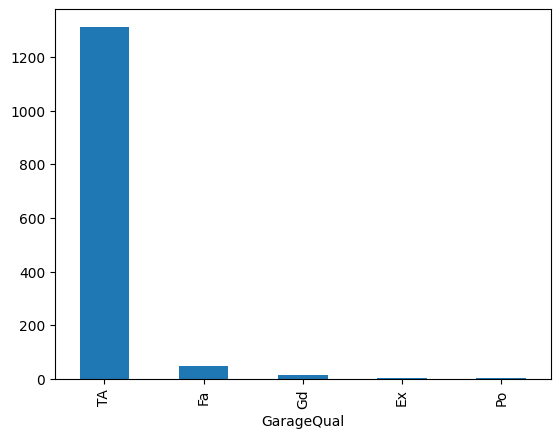

In [50]:
df.GarageQual.value_counts().sort_values(ascending=False).plot(kind='bar')

In [52]:
df.FireplaceQu.isna().value_counts()

FireplaceQu
False    770
True     690
Name: count, dtype: int64

Here both of the categories has almost equal values, for the practical purpose we want one category to dominate over another.

<Axes: xlabel='FireplaceQu'>

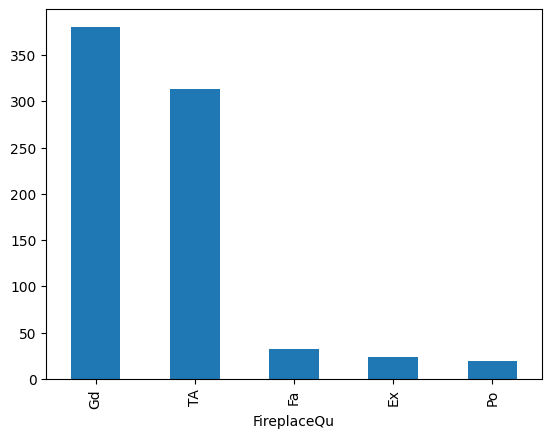

In [53]:
df.FireplaceQu.value_counts().plot(kind = 'bar')

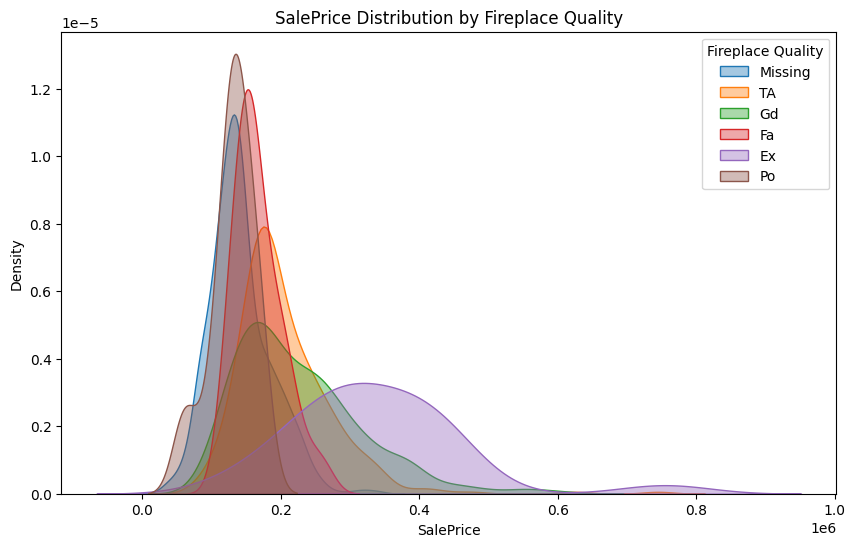

In [54]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for cat in df.FireplaceQu.fillna('Missing').unique():
    sns.kdeplot(
        df.loc[df.FireplaceQu.fillna('Missing') == cat, 'SalePrice'],
        label=str(cat),
        fill=True,
        alpha=0.4
    )
plt.legend(title='Fireplace Quality')
plt.xlabel('SalePrice')
plt.title('SalePrice Distribution by Fireplace Quality')
plt.show()

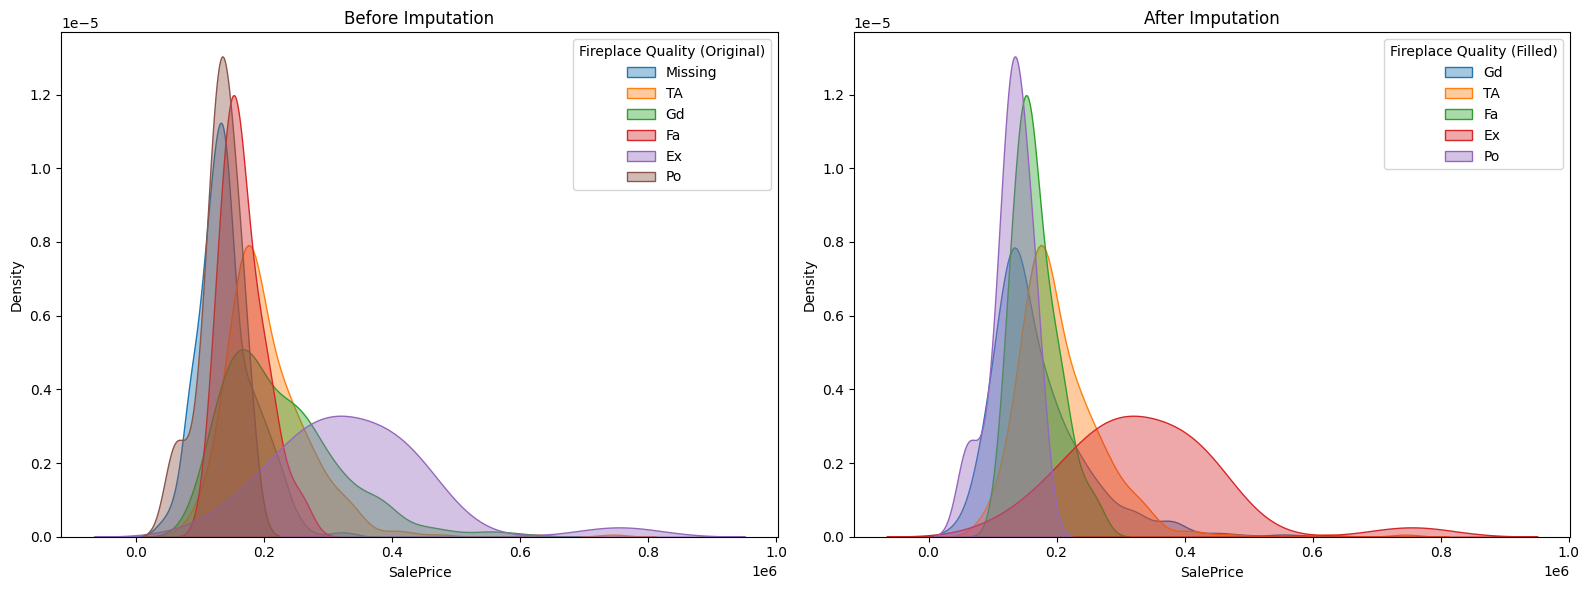

In [55]:
# Replace missing values in 'FireplaceQu' with the mode and create a new column
mode_value = df['FireplaceQu'].mode()[0]
df['FireplaceQu_filled'] = df['FireplaceQu'].fillna(mode_value)

# Plot before imputation
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
for cat in df['FireplaceQu'].fillna('Missing').unique():
    sns.kdeplot(
        df.loc[df['FireplaceQu'].fillna('Missing') == cat, 'SalePrice'],
        label=str(cat),
        fill=True,
        alpha=0.4
    )
plt.legend(title='Fireplace Quality (Original)')
plt.xlabel('SalePrice')
plt.title('Before Imputation')

# Plot after imputation
plt.subplot(1, 2, 2)
for cat in df['FireplaceQu_filled'].unique():
    sns.kdeplot(
        df.loc[df['FireplaceQu_filled'] == cat, 'SalePrice'],
        label=str(cat),
        fill=True,
        alpha=0.4
    )
plt.legend(title='Fireplace Quality (Filled)')
plt.xlabel('SalePrice')
plt.title('After Imputation')

plt.tight_layout()
plt.show()

As we can see , for the fireplacequ column the mode() or frequency value impute is not the right choice

In [56]:
from sklearn.model_selection import train_test_split

In [58]:
x_train , x_test, y_train ,y_test = train_test_split(df.drop(columns=['SalePrice']) , df.SalePrice , test_size=0.2 ,random_state=42)

In [59]:
from sklearn.impute import SimpleImputer

In [60]:
si = SimpleImputer(strategy='most_frequent')

In [61]:
x_train   = si.fit_transform(x_train)

In [63]:
x_test = si.fit_transform(x_test)

In [65]:
si

,missing_values,nan
,strategy,'most_frequent'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
